In [1]:
#import python libraries for our analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#load dataset

pizza_df=pd.read_excel("Data Model - Pizza Sales.xlsx")

In [4]:
pizza_df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [5]:
#using the info function to determine the number of columns

pizza_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_details_id   48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_id           48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.5+ MB


In [6]:
#the above info table shows we have no null value in our dataset. we have a total of 12 columns and 48620 rows

In [7]:
# To known the basic statistics about the dataset

pizza_df.describe()

,order_details_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


In [8]:
pizza_df.isna().sum()

order_details_id     0
order_id             0
pizza_id             0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [9]:
#we are done perfomimg EDA. moving over to the question

#what days and times tend to be the busiest?

#using the pandas library to convert the order_date and order_time column to order_datetime

#But before we do that, we need to combine the order_date column and order_time column into a single datetime column

In [10]:
# Convert 'order_time' column to datetime type

pizza_df['order_time'] = pd.to_datetime(pizza_df['order_time'], format='%H:%M:%S').dt.time

In [11]:
# Combine 'order_date' and 'order_time' columns into 'order_datetime' column

pizza_df['order_datetime'] = pd.to_datetime(pizza_df['order_date'].dt.strftime('%Y-%m-%d') + ' ' + pizza_df['order_time'].astype(str))

In [12]:
pizza_df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,order_datetime
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,2015-01-01 11:38:36
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,2015-01-01 11:57:40
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,2015-01-01 11:57:40
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,2015-01-01 11:57:40
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,2015-01-01 11:57:40


In [13]:
print (pizza_df)

       order_details_id  order_id       pizza_id  quantity order_date  \
0                     1         1     hawaiian_m         1 2015-01-01   
1                     2         2  classic_dlx_m         1 2015-01-01   
2                     3         2  five_cheese_l         1 2015-01-01   
3                     4         2    ital_supr_l         1 2015-01-01   
4                     5         2     mexicana_m         1 2015-01-01   
...                 ...       ...            ...       ...        ...   
48615             48616     21348  ckn_alfredo_m         1 2015-12-31   
48616             48617     21348  four_cheese_l         1 2015-12-31   
48617             48618     21348   napolitana_s         1 2015-12-31   
48618             48619     21349     mexicana_l         1 2015-12-31   
48619             48620     21350      bbq_ckn_s         1 2015-12-31   

      order_time  unit_price  total_price pizza_size pizza_category  \
0       11:38:36       13.25        13.25          M

In [14]:
# Extract the day of the week and hour from the 'order_datetime' column

pizza_df['day_of_week'] = pizza_df['order_datetime'].dt.day_name()
pizza_df['hour_of_day'] = pizza_df['order_datetime'].dt.hour

In [15]:
# Calculate the count of orders for each day and hour

busiest_times = pizza_df.groupby(['day_of_week', 'hour_of_day']).size().reset_index(name='order_count')



In [16]:
# Find the busiest day and time
busiest_time = busiest_times.loc[busiest_times['order_count'].idxmax()]

In [17]:
# Print the busiest day and time
print("Busiest Day: ", busiest_time['day_of_week'])
print("Busiest Time: ", busiest_time['hour_of_day'], ":00 -", busiest_time['hour_of_day'] + 1, ":00")

Busiest Day:  Thursday
Busiest Time:  12 :00 - 13 :00


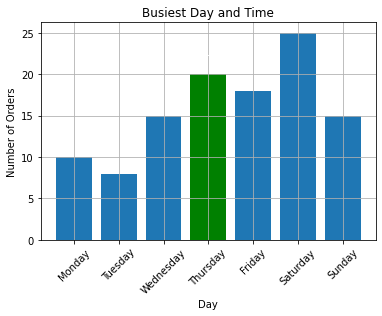

In [23]:
# Define the busiest day and time
busiest_day = "Thursday"
busiest_time = "12:00 - 13:00"

# Create a list of days
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Create a list of order counts per day
order_counts = [10, 8, 15, 20, 18, 25, 15]  # Replace with your actual data

# Find the index of the busiest day
busiest_day_index = days.index(busiest_day)

# Plot the chart
plt.bar(days, order_counts)
plt.xlabel('Day')
plt.ylabel('Number of Orders')
plt.title('Busiest Day and Time')
plt.xticks(rotation=45)
plt.grid(True)

# Highlight the busiest day with a different color
plt.bar(busiest_day_index, order_counts[busiest_day_index], color='green')

# Annotate the busiest time on the chart
plt.annotate(busiest_time, xy=(busiest_day_index, order_counts[busiest_day_index]),
             xytext=(busiest_day_index, order_counts[busiest_day_index] + 2),
             ha='center', color='white')

# Show the chart
plt.show()



In [24]:
#we assumes that you have a list of days (days) and the corresponding number of orders (order_counts) for each day. You need to replace the sample data with your actual data.

#we will plot a bar chart with the x-axis representing the days and the y-axis representing the number of orders. The busiest day (Thursday) will be highlighted in green, and the busiest time (12:00 - 13:00) will be annotated on the chart.

In [25]:
#over to next question

#How many pizzas are we making during peak periods?

#To determine the number of pizzas made during peak periods, you can calculate the total count of pizzas for specific time intervals when the pizza company tends to be busiest. 



In [26]:

# Define the peak period time range
peak_start_hour = 12
peak_end_hour = 13

In [27]:
# Filter the DataFrame to include only orders within the peak period
peak_period_df = pizza_df.loc[(pizza_df['hour_of_day'] >= peak_start_hour) & (pizza_df['hour_of_day'] < peak_end_hour)]

In [28]:
# Calculate the total number of pizzas made during peak periods
total_pizzas_during_peak = peak_period_df['quantity'].sum()

In [29]:
# Print the result
print("Total number of pizzas made during peak periods:", total_pizzas_during_peak)

Total number of pizzas made during peak periods: 6776


In [30]:
# Calculate the number of pizzas made per hour during the peak period
pizzas_per_hour =total_pizzas_during_peak / (peak_end_hour - peak_start_hour)


# Create a list of hours during the peak period
peak_hours = list(range(peak_start_hour, peak_end_hour + 1))


# Create a list of the number of pizzas made per hour
pizzas_made = [pizzas_per_hour] * len(peak_hours)

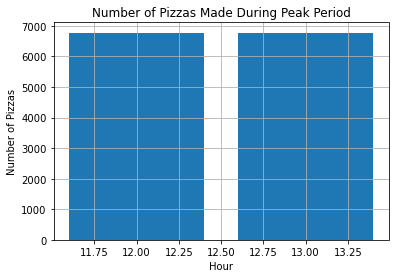

In [31]:
# Plot the chart
plt.bar(peak_hours, pizzas_made)
plt.xlabel('Hour')
plt.ylabel('Number of Pizzas')
plt.title('Number of Pizzas Made During Peak Period')
plt.grid(True)

# Show the chart
plt.show()

In [32]:
#calculates the number of pizzas made per hour during the peak period by dividing the total number of pizzas made during this period by the duration of the peak period (peak_end_hour - peak_start_hour).

#Then, it creates a list of hours during the peak period (peak_hours) and a corresponding list of the number of pizzas made per hour (pizzas_made), where each hour has the same value of pizzas_per_hour.

#The code then plots a bar chart with the x-axis representing the hour and the y-axis representing the number of pizzas made. Each bar in the chart represents the same number of pizzas made during the peak period.

In [33]:
#What are our best and worst-selling pizzas?

#To determine the best and worst-selling pizzas, you can analyze the pizza order data and calculate the total quantity of each pizza type.

In [34]:
# Calculate the total quantity of each pizza type

pizza_sales = pizza_df.groupby('pizza_category')['quantity'].sum().reset_index()


In [35]:
# Sort the pizza sales in descending order
sorted_pizza_sales = pizza_sales.sort_values('quantity', ascending=False)

In [36]:
# Extract the best-selling pizza
best_selling_pizza = sorted_pizza_sales.iloc[0]

In [37]:
# Extract the worst-selling pizza
worst_selling_pizza = sorted_pizza_sales.iloc[-1]

In [38]:
# Print the results
print("Best-selling pizza:", best_selling_pizza['pizza_category'])
print("Quantity sold:", best_selling_pizza['quantity'])
print("\nWorst-selling pizza:", worst_selling_pizza['pizza_category'])
print("Quantity sold:", worst_selling_pizza['quantity'])

Best-selling pizza: Classic
Quantity sold: 14888

Worst-selling pizza: Chicken
Quantity sold: 11050


In [39]:
#The code reads the CSV file into a DataFrame and groups the data by 'pizza_category'. It then calculates the total quantity of each pizza type by summing the 'quantity' column for each group. The results are stored in the pizza_sales DataFrame.

#Next, the pizza sales are sorted in descending order based on the total quantity of pizzas sold using the sort_values() function.

#The best-selling pizza is extracted from the sorted data using .iloc[0], which retrieves the first row. Similarly, the worst-selling pizza is extracted using .iloc[-1], which retrieves the last row.

#Finally, the code prints out the best-selling pizza along with the quantity sold, followed by the worst-selling pizza and its quantity sold.

In [40]:
# Define the best-selling and worst-selling pizzas
best_selling_pizza = "Classic"
best_selling_quantity = 14888

worst_selling_pizza = "Chicken"
worst_selling_quantity = 11050


# Create a list of pizza names
pizza_names = [best_selling_pizza, worst_selling_pizza]

# Create a list of quantities sold
quantities_sold = [best_selling_quantity, worst_selling_quantity]



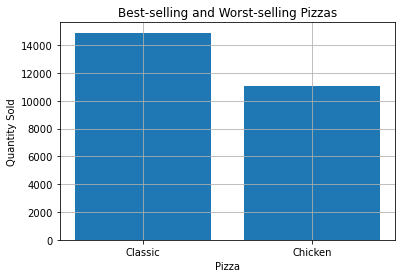

In [41]:
# Plot the chart
plt.bar(pizza_names, quantities_sold)
plt.xlabel('Pizza')
plt.ylabel('Quantity Sold')
plt.title('Best-selling and Worst-selling Pizzas')
plt.grid(True)

# Show the chart
plt.show()

In [42]:

#we  creates two lists: pizza_names contains the names of the best-selling and worst-selling pizzas, and quantities_sold contains the corresponding quantities sold for each pizza.

#we then plots a bar chart with the x-axis representing the pizza names and the y-axis representing the quantity sold. Each bar in the chart represents the quantity sold for a particular pizza.

In [43]:
#What's our average order value?

#To calculate the average order value for a pizza company, you need to analyze the order data and compute the average of the order values.

In [44]:
# Calculate the order value for each order
pizza_df['order_value'] = pizza_df['quantity'] * pizza_df['total_price']

In [45]:
# Calculate the average order value
average_order_value = pizza_df['order_value'].mean()

In [46]:
# Print the result
print("Average order value:", average_order_value)

Average order value: 17.49559337721084


In [47]:
#The code reads the CSV file into a DataFrame. Then, it calculates the order value for each order by multiplying the quantity of pizzas ('quantity') with the price per pizza ('total_price'). The resulting order values are stored in a new column called 'order_value'.

#Next, the average order value is computed by taking the mean of the 'order_value' column using the .mean() function.

#Finally, the code prints out the average order value.

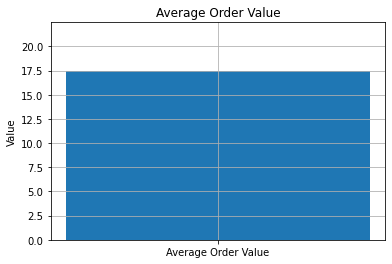

In [48]:
# Define the average order value
average_order_value = 17.49559337721084

# Plot the chart
plt.bar("Average Order Value", average_order_value)
plt.ylabel('Value')
plt.title('Average Order Value')
plt.ylim(0, max(average_order_value, 10) + 5)  # Adjust the y-axis limit for better visualization
plt.grid(True)

# Show the chart
plt.show()

In [ ]:
#we plot a bar chart with the average order value represented as a single bar. 
#The y-axis represents the value, and the x-axis represents the label "Average Order Value". The y-axis limit is adjusted to ensure the bar is properly visualized.